# Project Plan  

&emsp;&emsp; In this project we are investigating the correlation between various risk factors such as cholesterol, high-blood pressure, etc. and heart disease. The multivariate heart Disease Data Set we are using contains 270 instances, with 13 attributes that give us insight into the observed patients' biology and lifestyle. The Dataset is said to include Categorical values, Integer, and Real numbers. Some values are missing, so the data will need to be cleaned. 

&emsp;&emsp; This dataset has been cited in several research papers in the data science field including: Diversity in Neural Network Ensembles (Gavin Brown. The University of Birmingham. 2004.), Overcoming the Myopia of Inductive Learning Algorithms with RELIEFF (Igor Kononenko and Edvard Simec and Marko Robnik-Sikonja), Unanimous Voting using Support Vector Machines (Elena Smirnova and Ida G. Sprinkhuizen-Kuyper and I. Nalbantis and b. ERIM and Universiteit Rotterdam, IKAT, Universiteit Maastricht), Dissertation Towards Understanding Stacking Studies of a General Ensemble Learning Scheme ausgeführt zum Zwecke der Erlangung des akademischen Grades eines Doktors der technischen Naturwissenschaften.

&emsp;&emsp; The dataset was uploaded by the University of California, Irvine, and is available at the UCI machine learning archive on their website for the Center for Machine Learning and Intelligent Systems at the following URL: https://archive.ics.uci.edu/ml/datasets/statlog+(heart)

&emsp;&emsp; Our data set has already been processed and includes no missing values, so there is no need for a plot to summarize the proportion of missing data as this is non-applicable for all 13 attributes. The 13 attributes (which have been extracted from a larger set of 75) include descriptive variables such as sex, and Chest pain type (4 values), however, these values were already label encoded. As such, we are left with the following attribute types: Real: 1,4,5,8,10,12 Ordered:11,Binary: 2,6,9 Nominal:7,3,13

&emsp;&emsp; Given that the categorical values were already label encoded, the choice (label-encoded vs one hot-encoded) was made for us and we assume that the alphabetical ordering of label encoding will not prevent us from making medically relevant inferences from this data. In other words, we assume that the categorical value was ordered alphabetically as to represent the severity of the pain, for example, A-D. This assumption may give us trouble down the road, and should be further investigated.

&emsp;&emsp; If we were to work with categorical values for chest pain, one might suggest one-hot encoding to prevent any issues that may arise if there is no obvious ordering, or ranking of our values, and rather solve this potential problem by representing each category as a binary vector. However, in order to avoid the pitfalls of multicollinearity, it would be best to simply determine that categorical data is ranked appropriately and use label-encoding instead. Sex/Gender is binary, and so labelencoding can be considered appropriate.

&emsp;&emsp; We will be using k-means clustering to help identify variables that are most correlated to heart disease, and use dimensionality reduction across all attributes to determine the correlation between respective attributes and k-means.These techniques belong to the class of unsupervised learning and represent highly relevant skills in the toolbelt of every data miner, allowing us to demonstrate our progress throughout the course. At this point we are more concerned with descriptive analysis using the tools that we learned in data mining.    

If we were to continue our research into this data set we might concern ourselves with more predictive analysis using tools like classification and regression models.


\pagebreak

# Implementation

In [2]:
# Libraries
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.datasets import load_boston
import warnings
from sklearn.cluster import KMeans
import pandas as pd
import random
import networkx as nx
from scipy import *

In [3]:
# load the data

hearts = np.loadtxt("./data/heart.csv", delimiter=",")

In [4]:
# space for implemnetation code from previous projects code

# Function for the multivariate mean of a numerical data set
def twoDimMean(inputArr):
    total = np.zeros([len(inputArr[0])])
    num_elements = len(inputArr)

    for i in range(len(inputArr)):
        for j in range(len(inputArr[0])):
            xi = inputArr[:, j]
            total[j] = total[j] + xi[i]

    mean = total/num_elements
    return mean


# Function for sample covariance between two attributes
def covariance(a, b):
    x, y, total = 0, 0, 0
    n = len(a)
    # attr. Sum 
    for i in range(n):
        x = x + a[i]
        y = y + b[i]
    # attr. Mean
    xMean = x / n
    yMean = y / n

    # Covariance sum
    for i in range(n):
        total = total + ((a[i]) - xMean) * ((b[i]) - yMean)
    covariance = (1 / (n - 1)) * total
    return covariance



# Function for correlation between two attributes
def correlation(p1, p2):
    x, y, axb, a2, b2 = 0, 0, 0, 0, 0
    n = len(p1)

    for i in range(n):
        x = x + p1[i]
        y = y + p2[i]

    x_mean = x / n
    y_mean = y / n

    for i in range(n):
        a = (p1[i] - x_mean)
        b = (p2[i] - y_mean)
        axb = axb + (a * b)
        a2 = a2 + (a * a)
        b2 = b2 + (b * b)
    
    correlation = axb / (math.sqrt(a2 * b2))
    
    return correlation

# Function for min by column
# ref: https://www.geeksforgeeks.org/program-find-minimum-maximum-element-array/
def getMin(inputArr):
    value = inputArr[0]
    n = len(inputArr)
    for i in range(1, n):
        value = min(value, inputArr[i])
    return value


# Function for max by column
# ref: https://www.geeksforgeeks.org/program-find-minimum-maximum-element-array/
def getMax(inputArr):
    value = inputArr[0]
    n = len(inputArr)
    for i in range(1, n):
        value = max(value, inputArr[i])
    return value

def rangeNormal(inputArr):
    rowLen = len(inputArr)
    colLen = len(inputArr[0])
    rngNormal = np.empty([rowLen, colLen])
    
    for row in range(rowLen):
        for col in range(colLen):
            max_min = getMax(inputArr[:, col]) - getMin(inputArr[:, col])
            x_sub_min = (inputArr[row][col] - getMin(inputArr[:, col]))
            rngNormal[row][col] = x_sub_min / max_min
    return rngNormal

    # Helper function 
def oneDimMean(inputArr):
    total = 0
    numElements = 0

    for i in range(len(inputArr)):
        total = total + inputArr[i]
        numElements = numElements + 1
    mean = total / numElements
    return mean


# Helper function for SD
def stdDevHelper(inputArr):
    total = 0
    numElements = 0
    mean = oneDimMean(inputArr)

    for i in range(len(inputArr)):
        total = total + (inputArr[i] - mean) ** 2
        numElements = numElements + 1

    std_dev = math.sqrt(total / (numElements - 1))
    return std_dev


def listUnique(inputArr):
    unique = []
    for x in inputArr:
        if x not in unique:
            unique.append(x)
    return unique


def stdNormal(inputArr):
    rowLen = len(inputArr)
    colLen = len(inputArr[0])

    stdNormal = np.empty([rowLen, colLen])
    for i in range(rowLen):
        for j in range(colLen):
            xi = inputArr[i][j]
            colMean = oneDimMean(inputArr[:, j])
            stdDev = stdDevHelper(inputArr[:, j])
            stdNormal[i][j] = (xi - colMean) / stdDev
    return stdNormal


def covarMatrix(inputArr):
    # dim = np.array = inputArr.shape
    rowLen = inputArr.shape[1]
    
    covarMatrix = np.empty([rowLen, rowLen])
    for i in range(rowLen):
        for j in range(rowLen):
            xi = inputArr[:, i]
            xj = inputArr[:, j]
            covarMatrix[i,j] = covariance(xi, xj)
    return covarMatrix


def labelEncode(inputArr):
    rowLen = len(inputArr)
    colLen = len(inputArr[0])

    lblEncoded = np.empty([rowLen, colLen])
    for i in range(rowLen):
        for j in range(colLen):
            xi = inputArr[:, j]
            xu = listUnique(xi)
            lblEncoded[i][j] = xu.index(xi[i]) + 1

    return lblEncoded



In [5]:
# 2.1 Function to determine number of vertices in a graph
def number_of_vertices(graph):
    # tuples to list
    my_list = [item for x in graph for item in x]
    # casting to set to remove dublicate vals.
    my_set = set(my_list)
    counter = len(my_set)
    return counter


# 2.2 Function for finding the degree of a vertex
def degrees_of_vertex(graph, vertex):
    # Converting tuples to list
    my_list = [item for x in graph for item in x]
    counter = 0
    for i in my_list:
        if i == vertex:
            counter = counter + 1
    return counter

# number of edges from a subgraph
def subgraph_num_edges(graph, vertices):
    Graph = nx.Graph()
    Graph.add_edges_from(graph)
    induced_subgraph = Graph.subgraph(vertices)
    number_of_edges = nx.number_of_edges(induced_subgraph)
    return number_of_edges


# Creates the graph
def create_graph(edges_of_graph):
    Graph = nx.Graph()
    Graph.add_edges_from(edges_of_graph)
    return Graph

# Clustering Coefficient
def clustering_coefficient(graph, vertex):
    # Obtains a list of all the edges of the given vertex
    f_list = list(filter(lambda x: vertex in x, graph))
    # Converts the list of tuples into a regular list
    my_list = [item for x in f_list for item in x]
    # __ne__ is 'not equal' paramter.
    edges = list(filter(vertex.__ne__, my_list))
    current_total_edges = subgraph_num_edges(edges, graph)
    number_of_edges = len(edges)
    maximum_total_edges = (number_of_edges - 1) * (number_of_edges / 2)
    clustering = current_total_edges / maximum_total_edges
    return clustering

# Function for finding the betweenness centrality of a vertex
def betweenness_centrality(graph, vertex):
    vals = []
    b_cent = 0
    size = number_of_vertices(graph)
    graph = create_graph(graph)

    if graph[0][0] == 1:
        vertecies = list(range(1, 1 + size))
    else:
        vertecies = list(range(0, size))

    vertecies.remove(vertex)

    # list of pair values.
    for s in range(len(vertecies)):
        for t in range(len(vertecies)):
            if s != t:
                vals = vals + [[vertecies[s], vertecies[t]]]

    # no duplicates.
    s = set()
    out = []
    for i in vals:
        t = tuple(i)
        if t in s or tuple(reversed(t)) in s:
            continue
        s.add(t)
        out.append(i)

    x_part = [i[0] for i in out]
    y_part = [i[1] for i in out]

    # finding shortest paths
    for (x, y) in zip(x_part, y_part):
        counter = 0

        # Get a list of all the shortest paths for every pair of nodes
        list_shortest_paths = list([p for p in nx.all_shortest_paths(graph, source=x, target=y)])

        # Get the total number of shortest paths
        number_of_shortest_path = len(list_shortest_paths)

        # Flatten the nested list into a list of single elements
        flat_list = [item for sublist in list_shortest_paths for item in sublist]

        # counting occurances of betweeness of a node
        for i in flat_list:
            if i == vertex:
                counter = counter + 1

        # Result
        b_cent = b_cent + (counter / number_of_shortest_path)
    return b_cent


def adj_matrix(graph):
    vertices = number_of_vertices(graph)
    # Initilize empty array
    matrix_array = np.zeros((vertices, vertices))
    # Use the vertices as coordinate to iterate thru the array
    x_part = [i[0]-1 for i in graph]
    y_part = [i[1]-1 for i in graph]
    # modifies the matrix.
    for (x, y) in zip(x_part, y_part):
        matrix_array[x][y] = 1
        matrix_array[y][x] = 1
    return matrix_array


def prestiege_centrality(matrix_arrr):
    current_vector = np.ones(len(matrix_arrr))
    previous_vector = np.ones(len(matrix_arrr))
    result = np.ones(len(matrix_arrr))
    for i in range(100):
        previous_vector = current_vector
        current_vector = np.dot(matrix_arrr, previous_vector)
        result = np.dot(current_vector, (1/np.linalg.norm(current_vector, 2)))
    return result


# Citations
# https://www.geeksforgeeks.org/python-find-the-tuples-containing-the-given-element-from-a-list-of-tuples
# https://networkx.org/documentation/
# https://stackoverflow.com/questions/613183/how-do-i-sort-a-dictionary-by-value
# https://towardsdatascience.com/customizing-networkx-graphs-f80b4e69bedf

In [6]:
#Get distance between 2 points
def distance(mean_point, distance_point):
    return math.sqrt(sum([(mean_point[index] - distance_point[index]) ** 2 for index in range(len(mean_point))]))


#Return if in neighborhood
def within_neighborhood(point_1, point_2, max_distance):
    return distance(point_1, point_2) <= max_distance

#Create Random starting values for kmeans
def randomize(ranges, k):
    output = []
    while k > 0:
        output.append(tuple([random.uniform(ranges[column][0], ranges[column][1]) for column in range(len(ranges))]))
        k -= 1
    return output


#Find mean based on index subset
def mean(matrix, indexes):
    array = list(zip(*[list(matrix[index, :]) for index in indexes]))
    array = [list(item) for item in array]
    return tuple([sum(index)/len(index) for index in array])

#Return index of closest point in cluster points to point(used to find closest cluster)
def closest(cluster_points, point):
    distances = [distance(cluster_point, point) for cluster_point in cluster_points]
    return distances.index(min(distances))

#Uses Kmeans Algorithm to return cluster points and matrix row indexes in each cluster
def kmeans(matrix, k = 2, e = 10000):
    ranges = [(min(matrix[:,column]), max(matrix[:,column]))  for column in range(len(matrix[0]))]
    start_points = []
    end_points = randomize(ranges, k)
    clusters = []
    while start_points != end_points and e > 0:
        start_points = end_points
        clusters = [[] for index in range(k)]
        for row in range(len(matrix)):
            clusters[closest(start_points, tuple(matrix[row]))].append(row)
        end_points = [mean(matrix, item) for item in clusters]
        e -= 1
    return end_points, clusters


class Point():
    #Point is a tuple of point values
    def __init__(self, point):
        self.point = point
        self.label =  "noise"
        self.cluster = []

    def get_cluster(self, cluster = [], loop = 0):
        length = len(cluster)
        new = [self] + self.cluster
        cluster = cluster + new
        cluster = list(set(cluster))
        if len(cluster) == length:
            return cluster
        for item in new:
            cluster = item.get_cluster(cluster = cluster, loop = loop+1)
        return cluster


def dbscan(matrix, minpts = 5, e = 10000):
    points = [Point(tuple(matrix[row,:])) for row in range(len(matrix))]
    for item in points:
        for other in points:
            if within_neighborhood(item.point, other.point, minpts):
                item.cluster.append(other)
                other.cluster.append(item)
    for item in points:
        item.cluster = list(set(item.cluster))
        if len(item.cluster) >= minpts:
            item.label = "core"
        else:
            for other in item.cluster:
                if other.label == "core":
                    item.label = "border"
                    break
    output =  list(set([tuple(point.get_cluster()) for point in points]))
    return [list(item) for item in output]


\pagebreak

# Report
## What problem were you trying to solve or help solve?

In this project we were trying to explore whether there was a strong correlation between the principal components of our data set. 
Our objective was to graphically represent any such relationship to convey our findings in the most impactful manner possible. 
A picture speaks a thousand words, and this has been our experience when it comes to data mining. A graph will usually be a more
impactful representation of our findings as compared to data points like p-value, variance or the likes.

## Describe the data:
- How many instances?  
There are 270 instances
- How many attributes?  
There are 13 attributes
- Any missing Values?  
There are no missing values.
- Number of categorical and numeric attributes?  
The 13 attributes (which have been extracted from a larger set of 75) include descriptive variables such as sex, and Chest pain type (4 values), however, these values were already label encoded. As such, we are left with the following attribute types: Real: 1,4,5,8,10,12 Ordered:11, Binary: 2,6,9 Nominal:7,3,13

## What pre-processing techniques did you apply and when? Make sure to justify the use of each technique you used. For example label vs. one-hot encoding.
There are no preprocessing techniques that we needed. The data was already label-encoded therefore we did not need to do that.

## What data mining techniques did you apply and why? Mkae sure to justify the use of each technique you used. For example, why did you use k-means instead of DBSCAN.
We are choosing DBSCAN because we want to accurately identify the outliers.


## Include relevant visualizations and tables summarizing your data and your findings. This may include:
- a table listing the number attributes, missing values, number of classes, parameter set-tings, etc.
- visualization of a large graph if you are working with graph data.
- one or more visualizations of your data in two dimensions (original dimensions or PCA dimensions).
- for PCA, a plot of r vs. f(r).
- for k-means, a plot of the objective function for various k’s.
- for DBSCAN, a plot or table of the precision at various parameters.
- other visualizations or tables that you think will effectively communicate your ideas.

In [9]:
# code for the report
Data = np.genfromtxt('data/heart.csv', delimiter=",")
DF = pd.DataFrame(Data)

DF.shape

(270, 14)

In [36]:
DF.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0,2.0
1,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,1.0
2,57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0,2.0
3,64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0,1.0
4,74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0,1.0


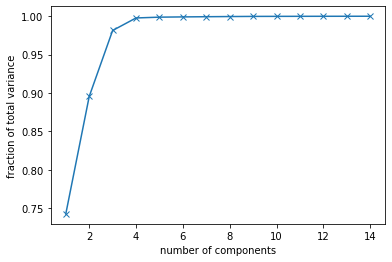

The explained variance using two principal components:  0.8954315961629573


In [34]:
pca = PCA()
pca_data = pca.fit_transform(Data)

explained_variance=pca.explained_variance_ratio_[0]+pca.explained_variance_ratio_[1]
plt.plot(range(1,15),np.cumsum(pca.explained_variance_ratio_), marker='x')
plt.xlabel('number of components')
plt.ylabel('fraction of total variance')
plt.show()

print("The explained variance using two principal components: ", explained_variance)

Original Data's Number of Clusters at min_samples=3: 8
PCA Data's Number of Clusters at min_samples=3: 8


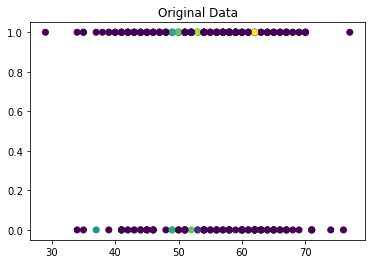

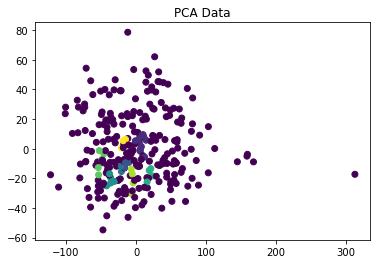

In [42]:
dbs1 = DBSCAN(eps=10, min_samples=3)
dbs1_labels = dbs1.fit_predict(Data)
print("Original Data's Number of Clusters at min_samples=3:" , max(dbs1_labels)+1)
pca1_labels = dbs1.fit_predict(pca_data)
print("PCA Data's Number of Clusters at min_samples=3:" , max(pca1_labels)+1)

plt.scatter(Data[:,0], Data[:,1],c=dbs1_labels)
plt.title("Original Data")
plt.show()

plt.scatter(pca_data[:,0], pca_data[:,1],c=pca1_labels)
plt.title("PCA Data")
plt.show()

Original Data's Number of Clusters at min_samples=3: 10
PCA Data's Number of Clusters at min_samples=3: 10


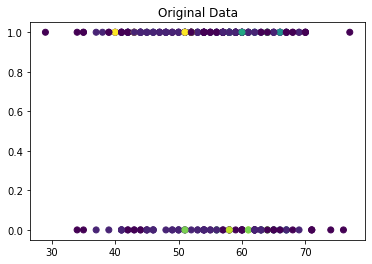

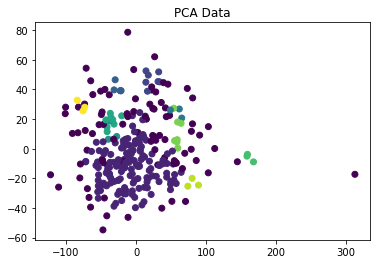

In [43]:
dbs1 = DBSCAN(eps=16, min_samples=3)
dbs1_labels = dbs1.fit_predict(Data)
print("Original Data's Number of Clusters at min_samples=3:" , max(dbs1_labels)+1)
pca1_labels = dbs1.fit_predict(pca_data)
print("PCA Data's Number of Clusters at min_samples=3:" , max(pca1_labels)+1)

plt.scatter(Data[:,0], Data[:,1],c=dbs1_labels)
plt.title("Original Data")
plt.show()

plt.scatter(pca_data[:,0], pca_data[:,1],c=pca1_labels)
plt.title("PCA Data")
plt.show()

Original Data's Number of Clusters at min_samples=3: 6
PCA Data's Number of Clusters at min_samples=3: 6


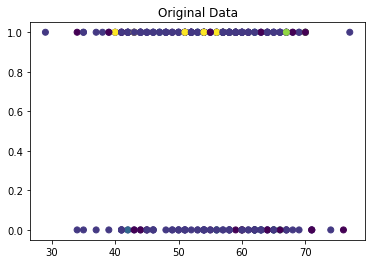

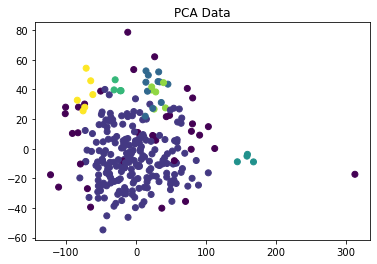

In [44]:
dbs1 = DBSCAN(eps=20, min_samples=3)
dbs1_labels = dbs1.fit_predict(Data)
print("Original Data's Number of Clusters at min_samples=3:" , max(dbs1_labels)+1)
pca1_labels = dbs1.fit_predict(pca_data)
print("PCA Data's Number of Clusters at min_samples=3:" , max(pca1_labels)+1)

plt.scatter(Data[:,0], Data[:,1],c=dbs1_labels)
plt.title("Original Data")
plt.show()

plt.scatter(pca_data[:,0], pca_data[:,1],c=pca1_labels)
plt.title("PCA Data")
plt.show()

## What did you learn through your analysis?


## Was anything about your results surprising or unexpected?



## How will your work help with understanding the problem you set out to solve?


## What else would you do if you had more time?

\pagebreak

# Present

Make a 5-10 minute video presentation summarizing your findings. You may use whatever video  
editing technology you prefer. (The MSU supported tool is TechSmith Relay. See the UIT tutorial for more info.) The video should:  
• State your name.  
• Summarize your project, including:  
– the problem you are interested in.  
– what data mining techniques you used to analyze data related to the problem.  
• Your key findings and any surprising results.  
• What else you would work on if you had more time.  
The goal is to summarize the work you have done and what you have learned from the process.  
Note: any presentation that exceeds 10 minutes or does not reach 5 minutes will be docked 1 point per minute.  